## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

In [30]:
! git clone https://github.com/ds4e/knn

fatal: destination path 'knn' already exists and is not an empty directory.


**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. What is the difference between regression and classification?

Regression models "find correlations between dependent and independent variables". Regression models help display how one variable impacts another. Classification is an "algorithm that finds functions that help divide the dataset into classes based on various parameters." (https://www.simplilearn.com/regression-vs-classification-in-machine-learning-article)

2. What is a confusion table? What does it help us understand about a model's performance?

A confusion matrix is a table that is "used to assess the performance of a classification model." There are a couple of metrics that go along with confusion tables, such as accuracy, precision, recall, and specificity. The table tells the user wheree the model gets "confused" with the data. It also details the strengths and weknesses of the model.

(https://datatron.com/understanding-the-confusion-matrix-for-model-evaluation-monitoring/#:~:text=A%20confusion%20matrix%2C%20also%20known,broken%20down%20by%20each%20class.)(https://www.v7labs.com/blog/confusion-matrix-guide)



3. What does the SSE quantify about a particular model?

SSE, or error sum of squares, "measures the difference between actual and predicted values of the dependent variable." This value "reflects the remaininr error" from model. Essentially, it lets the user know what part of the model can't be explainted by the modle itself.
(https://www.datacamp.com/tutorial/regression-sum-of-squares)

4. What are overfitting and underfitting?

Oversitting "happens when a model leanrs too mucdh from the training data." It doesn't respond well to new data as it learned too much from the training set. Underfitting does the opposite, it doesn't "do well in practice tests or real exams." However, it is importnat to note that underfitting models have "high bias and low variance."

(https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/)

5. Why does splitting the data into training and testing sets, and choosing  𝑘  by evaluating accuracy or SSE on the test set, improve model performance?

Splitting the data into training and testing sets improves model performance because it "allows you to realisticallt measure a model's performande by ensuring that the dataset used to train the modela nd the detaset used to evaluate it are distinct." Splitting the data improves model performance because the model is able to train itself with the trianing dataset in oder to figure out kinds while the testing seet then goes on to test how well the data has been trained and meausred for accuracy. (https://encord.com/blog/train-val-test-split/#:~:text=It%20serves%20as%20an%20unbiased,benchmark%20of%20the%20model's%20performance.)


6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

A class label "provides simplicity and ease of interpretation, while reporting a probability distribution." Some strengths of a class distribution are that it is easy to understand, it is a good choice during simple applications, and it is easy when making quick decisions. Some cons are that it is not useful in complex scenarios, it does not convey the model's confidence level. A probability distribution is useseful during "more complex" datasets that require more nuanced interpretation that "may require futher processing." Some strengths for the model include the fact that it does provide confidence information, it "enables nuanced decision making" and it is great in "complex scenarios." Some weaknesses include that probability distributions are complex to interpret, and may require "further processing."

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
airbnb = pd.read_csv('/content/knn/data/airbnb_hw.csv')

In [33]:
#Keep relevant columns
airbnb_complete = airbnb.loc[:,['Review Scores Rating','Price','Beds']]

#Check for missing review score values
airbnb_missing = airbnb_complete[airbnb_complete['Review Scores Rating'].isnull()]


In [34]:
#Eliminate observations with missing values
airbnb_complete = airbnb_complete.dropna(axis = 0, how = 'any')
airbnb_complete['Price'] = pd.to_numeric(airbnb_complete['Price'].str.replace(',', ''), errors='coerce')

<ipython-input-34-563f04e4f7ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_complete['Price'] = pd.to_numeric(airbnb_complete['Price'].str.replace(',', ''), errors='coerce')


In [35]:
#Create a k-NN model using Price and Beds to Predict Review Scores Rating by splitting data into train and split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define features (X) and target (y)
X = airbnb_complete[['Price', 'Beds']]
y = airbnb_complete['Review Scores Rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
for k in range(1, 21):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    sse = mean_squared_error(y_test, y_pred) * len(y_test)  # Calculate SSE

if sse < min_sse:
        min_sse = sse
        best_k = k

print(f"The best k value is: {best_k}")

The best k value is: 1


In [44]:
#Train kNN model with optimal k
knn_model = KNeighborsRegressor(n_neighbors=best_k)
knn_model.fit(X, y)

#Predict missing values
airbnb_missing = airbnb_missing.dropna(subset=['Price', 'Beds'])
airbnb_missing["Review Scores Rating"] = knn_model.predict(airbnb_missing[["Price", "Beds"]])


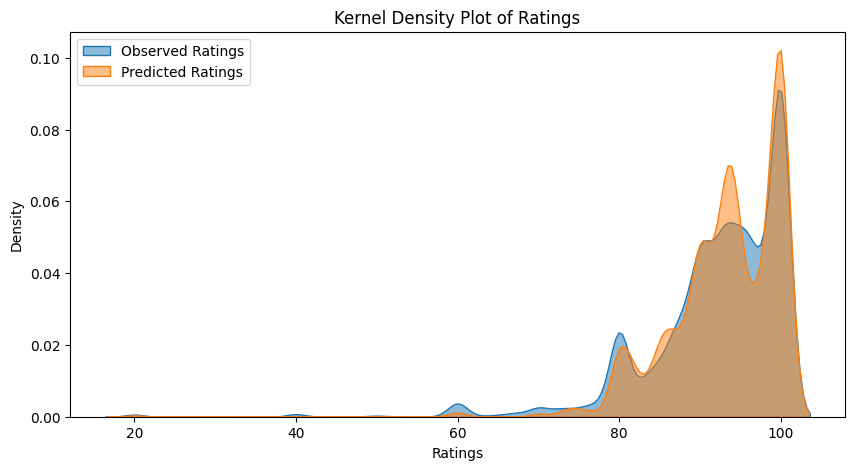

In [49]:
# Plot kernel density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(data=airbnb_complete['Review Scores Rating'], label='Observed Ratings', fill=True, alpha=0.5)

#KDE for predicted ratings
sns.kdeplot(data=airbnb_missing['Review Scores Rating'], label='Predicted Ratings', fill=True, alpha=0.5)

plt.title('Kernel Density Plot of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.legend()
plt.show()

#Do they look similar or not?: The plots are kind of similar because most of the data is consolidated between 80 to 100. However, the predicted ratings have a slightly higher density closer to 100 compared to the observed ratings that have a higerh density closer to 60.